<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de transformación de variables**

Este taller guiado tiene como objetivo hacer un acercamiento práctico a la transformación de variables, fase previa al trabajo de modelamiento. En este taller veremos como transformar variables categóricas y numéricas para que sean más facilmente procesables por los algoritmos de Machine Learning. Usaremos la librería de pandas y de *Scikit Learn*.

*Scikit-learn* es la librería gratuita de Python por excelencia para Machine Learning, contiene una gran cantidad de algoritmos para el entrenamiento de modelos de computación avanzados. Se fundamenta en la librería *NumPy*, utiliza todo tipo de arrays en operaciones matriciales de alta eficiencia. En este notebook utilizaremos uno de sus módulos diseñado para el procesamiento de las características o variables de estudio. En siguientes lecciones veremos como utilizar *Scikit-learn* para la creación y optimización de modelos.

##**1)-Instalar e importar los paquetes necesarios**

In [ ]:
!pip install sklearn -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

## **2)-Cargar datos**

Para este taller vamos a cargar el dataset Iris, un conjunto de datos que ya conocemos y hemos trabajo previamente. Para mayor información acerca del dataset iris consulte.

https://archive.ics.uci.edu/ml/datasets/Iris

Para mayor información de los datasets disponibles en sklearn consulte.

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [5]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names=['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

iris = pd.read_csv(url,names=names)

iris

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Para recordar...

El dataset Iris está conformado por 150 observaciones. En este dataset hay 3 tipos de flores identificadas en la variable Species. Para cada observación se tomaron 4 mediciones, ancho y largo del pétalo y ancho y largo del sépalo. A continuación encontrará un breve resumen estadístico.

## **3. ¿Por qué transformar las variables**

La mayoría de algoritmos de Machine Learning solo reciben variables numericas, para superar este inconveniente y utilizar variables categóricas como variables predictoras es necesario hacer un preprocesamiento sobre las variables y transformarlas en números. Este proceso se conoce como numerización. 

Existen 2 formas para hacer este proceso, está por un lado la numerización usando variables *dummy*, también conocido como One-Hot-Encoding. Y por otro lado está los *ordinal encoder*.

Por otro lado, algunas transformaciones pueden ser aplicadas a variables cuantitativas, en este caso para disminuir la variabilidad y facilitar el procesamiento de los algoritmos. Existen estandarizaciones como el centrado, escalamiento, autoescamiento y también normalizaciones usando el *min-max*.

## **4. Numerización de variables categóricas**

### **Codificación Dummy**

Aplicamos la función get_dummies, con la cual transformamos automáticamente todas las columnas categóricas a una codificación única (one-hot encoding). Esta codificación crea tantas variables como categorías existen en una variable. La variable `Species` toma 3 valores posibles: Iris-setosa, Iris-versicolor y Iris-virginica. El codificador creará 3 variables *dummy*, una por cada valor posible, estas nuevas variables serán llenados con ceros y unos según corresponda para observación.

Puede consultar los siguientes links para más información.

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [3]:
#transforma la variable que sea categórica, en este caso Species
iris_dummies = pd.get_dummies(iris, columns = ['Species'])

In [4]:
# Observe las nuevas 3 columnas que han sido creadas
iris_dummies

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### **Codificación ordinal**

Para este ejemplo vamos a crear un dataframe con una variable llamada `Degree`, el grado escolar puede tomar varios valores, estos valores pueden ser organizados de menor grado de escolarización al mayor, por lo tanto se trata de una variable categórica ordinal. Para más información sobre `Ordinal Encoder` consulte [aquí](https://contrib.scikit-learn.org/category_encoders/ordinal.html).

In [ ]:
train_df = pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school'],
                         'Status': ['Single','Single','Married','Single', 'Divorced', 'Married','Single','Divorced','Single']})
train_df

,Degree,Status
0,High school,Single
1,Masters,Single
2,Diploma,Married
3,Bachelors,Single
4,Bachelors,Divorced
5,Masters,Married
6,Phd,Single
7,High school,Divorced
8,High school,Single


In [ ]:
# Importamos el codificador
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder() # Se declara un objeto con la información del codificador

# Se aplica el método de ajuste y transformación y se pasan los datos para transformar
train_ordinal = encoder.fit_transform(train_df)

train_ordinal # Note que se transforman ambas variables categóricas

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Degree,Status
0,1,1
1,2,1
2,3,2
3,4,1
4,4,3
5,2,2
6,5,1
7,1,3
8,1,1


En esta primera codificación efectivamente se pasaron a numeros las categorías, sin embargo los numeros asignados no representan el orden que la variable `Degree` y `Status` poseen. Para darle ese orden debemos pasar un argumento adicional al `encoder` que específique el `mapping` que intentamos hacer.

|Grado|Representación|
|--|--|
|None|0|}
|High School|1|
|Diploma|2|
|Bachelors|3|
|Masters|4|
|Phd|5|


In [ ]:
# Importamos el codificador
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(      # Se declara un objeto con la información del codificador
    mapping=[
             {'col':'Degree', # Se especifica la columna sobre la cual se hace el mapeo
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}
]
)
# Se pasa un diccionario con la información del orden para cada categorpía


# Se aplica el método de ajuste y transformación y se pasan los datos para transformar
train_ordinal = encoder.fit_transform(train_df)

train_ordinal # Note que solo se transforma la columna Degree


,Degree,Status
0,1,Single
1,4,Single
2,2,Married
3,3,Single
4,3,Divorced
5,4,Married
6,5,Single
7,1,Divorced
8,1,Single


In [ ]:
# Importamos el codificador
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(      # Se declara un objeto con la información del codificador
    mapping=[
             {'col':'Degree', # Se especifica la columna sobre la cual se hace el mapeo
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}},
{'col': 'Status',
 'mapping': {'Single': 0,'Married':1,'Divorced':2 }}]
)
# Se pasa un diccionario con la información del orden para cada categorpía


# Se aplica el método de ajuste y transformación y se pasan los datos para transformar
train_ordinal = encoder.fit_transform(train_df)

train_ordinal # Note que solo se transforma la columna Degree


,Degree,Status
0,1,0
1,4,0
2,2,1
3,3,0
4,3,2
5,4,1
6,5,0
7,1,2
8,1,0


Esta codificación también se puede hacer con el `sklearn.preprocessing.OrdinalEncoder`. Consulte la documentación [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

## **5. Transformación de variables numéricas**

Con ayuda de un boxplot primero visualicemos las 4 variables numéricas de forma comparativa. Tienen centros (media-mediana) diferentes, dispersión diferente y rangos diferentes. Aplicaremos diferentes procesos de estandarización que buscan lidiar con estas diferencias.

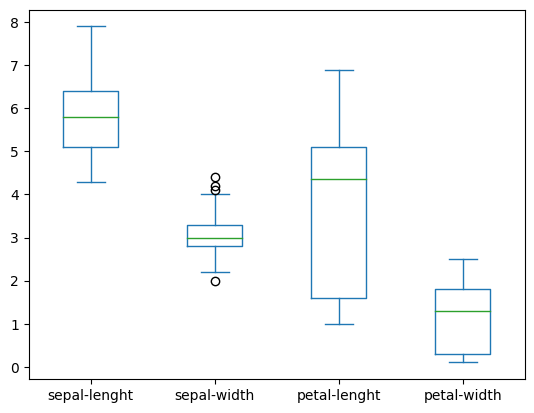

In [ ]:
iris.plot(kind='box')
plt.show()

In [ ]:
iris.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Estandarización

Es una técnica de escalamiento donde los valores son centrados alrededor de la media con una unidad de desviación estándar. 

Para cada valor de $X$ dentro de una variable se aplica la siguiente formula. Donde $\mu$ es la media de los datos y $σ$ es la desviación estándar.

$$X' = \frac{X - \mu}{σ}$$

Para mayor información del transformador consulte [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Note que con este transformador podemos aplicar el centrado únicamente con `with_mean=True, with_std=False` o únicamente la estandarización de la variabilidad con `with_mean=True, with_std=False`

In [ ]:
# Se crea un objeto que contiene la información del escalador
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)

# Se ejecuta el método fit_transform sobre los datos objetivo
iris_scaled = scaler.fit_transform(iris.iloc[:,0:4])

# Los resultados se obtienen en un arreglo de numpy
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [ ]:
# Se transforma a un dataframe
iris_scaled = pd.DataFrame(iris_scaled, columns= names[:4])

# Se obtiene el resumen de descriptiva
iris_scaled.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [ ]:
iris_scaled.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Note en el resumen anterior que la media tiende a ser 0 y a su vez la desviación estándar tiende a ser 1. En la siguiente gráfica verá este cambio de forma gráfica. A la izquierda los datos sin estandarizar y a la derecha los datos estandarizados.

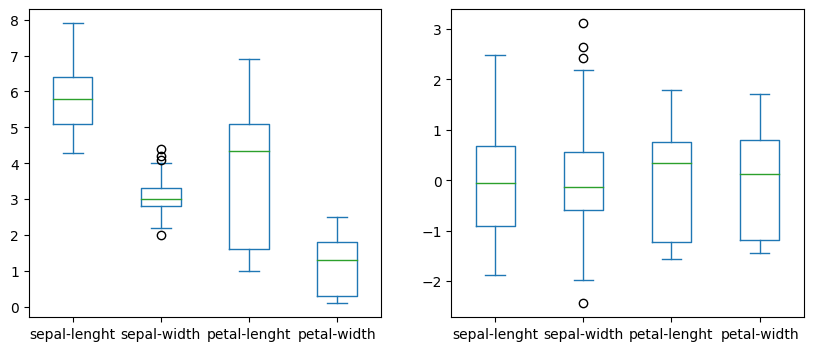

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (10,4))

iris_scaled.plot(kind='box',ax = ax[1])
iris.plot(kind = 'box', ax = ax[0])
plt.show();

### **Normalización**

La normalización es una técnica de escalimiento en la cual los valores de una variable son desplazados y escalados para que su nuevo rango se ubique entre 0 y 1. Se conoce también con el nombre de *Min-Max scaling*. Para transformar los datos se debe aplicar la siguiente ecuación, donde $X$ es cada dato de una variable, $X_{min}$ es el valor mínimo que toma esta variable y $X_{max}$ es el valor máximo.

$$X'= \frac{X-X_{min}}{X_{max}-X_{min}}$$

Para mayor información de este transformador consulte [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
# Se declara un objeto que contiene la información del escalador
minmax = preprocessing.MinMaxScaler()

# Se ejecuta el método fit transform sobre los datos
iris_minmax = minmax.fit_transform(iris.iloc[:,0:4])

# Se convierte la salida en un daraframe
iris_minmax = pd.DataFrame(iris_minmax, columns= names[:4] )


In [ ]:
# Se obtiene un resumen
iris_minmax.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


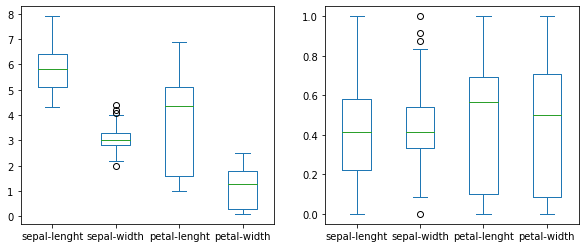

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (10,4))

iris.plot(kind = 'box', ax = ax[0])
iris_minmax.plot(kind='box',ax = ax[1])
plt.show();

**Unir varios datos frame**

In [ ]:
iris_transformed = pd.concat([iris_scaled, iris_dummies],axis= 1)

iris_transformed

,sepal-lenght,sepal-width,petal-lenght,petal-width,sepal-lenght,sepal-width,petal-lenght,petal-width,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,6.179561,8.099104,0.796120,0.262946,5.1,3.5,1.4,0.2,1,0,0
1,5.937226,6.942089,0.796120,0.262946,4.9,3.0,1.4,0.2,1,0,0
2,5.694890,7.404895,0.739254,0.262946,4.7,3.2,1.3,0.2,1,0,0
3,5.573722,7.173492,0.852986,0.262946,4.6,3.1,1.5,0.2,1,0,0
4,6.058394,8.330507,0.796120,0.262946,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,8.118247,6.942089,2.957017,3.023878,6.7,3.0,5.2,2.3,0,0,1
146,7.633576,5.785074,2.843285,2.497986,6.3,2.5,5.0,1.9,0,0,1
147,7.875912,6.942089,2.957017,2.629459,6.5,3.0,5.2,2.0,0,0,1
148,7.512408,7.867701,3.070748,3.023878,6.2,3.4,5.4,2.3,0,0,1


## **Recursos adicionales**

Artículo acerca de la importancia de la transformación de variables numéricas, Normalización vs Estandarización - [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

**Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*